In [16]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import statistics
from scipy.stats import zscore
from sklearn import preprocessing



forest = pd.read_excel('forestlandex.xlsx')   # reading all my datasets in excel using pandas  
greenhouse= pd.read_excel('greenhouse.xlsx')
arable= pd.read_excel('arable.xlsx')

"""

The following code in this cell will be cleaning and manipulating dataset while also 
defining certain functions like manipulate so that i can extract information easier
while also cleaning certain things i don't need and columning() for renaming columns
after extracting certain columns that i want from different dataset

"""



def manipulate(x):
    
    x=x.transpose() #transpose the dataset
    x=x.rename(columns=x.iloc[0]) #set the column 0 as my heading
    x=x.rename(columns={"Country Name":"Year"}) #correct the column to year
    x=x.dropna(axis=1,how='all') #drop all Non-Available column
    x=x.drop(x.index[0:34]) #delete these columns for dataset range purpose at 1990-latest
    x=x.set_index("Year") # reset the numbered label index
    
    return x

def columning(g):
    g.columns.values[0] = "Arable Land"   #function for renaming the column to arable land,forest and greenhouse 
    g.columns.values[1] = "Forest"
    g.columns.values[2] = "Greenhouse"
    
    

forest=manipulate(forest)   # manipulate all the dataset with the function i defined, manipulate()
arable=manipulate(arable)
greenhouse=manipulate(greenhouse)



In [17]:
brazilf=forest["Brazil"]             # Extracting the column with the country that I want form different datasets
brazila=arable["Brazil"]
brazilg=greenhouse["Brazil"]

monf=forest["Mongolia"]
mona=arable["Mongolia"]
mong=greenhouse["Mongolia"]


ausf=forest["Australia"]
ausa=arable["Australia"]
ausg=greenhouse["Australia"]


wf=forest["World"]
wa=arable["World"]
wg=greenhouse["World"]


"""
The code below is to concatenate the columns with the target country
from both dataset so that i can plot it easily.

"""
brazild=pd.concat([brazila,brazilf],axis=1)
mongd=pd.concat([mona,monf],axis=1)            
ausd=pd.concat([ausa,ausf],axis=1)
worldd=pd.concat([wa,wf],axis=1)

In [18]:
"""
The code right below this docstring is for renaming the column for my concatenated columns
however i do not need to do it for the other countries because i only need those two variable
for plt.legend() where they need to capture my handles

"""
ba=brazild.columns.values[0] = "Arable Land"   
bf=brazild.columns.values[1] = "Forest"


zscorebrazil = (brazild - brazild.mean())/brazild.std() # z score normalization for all columns to get same units for plotting
zscoremong = (mongd - mongd.mean())/mongd.std()
zscoreaus = (ausd - ausd.mean())/ausd.std()
zscoreworld= (worldd - worldd.mean())/worldd.std()




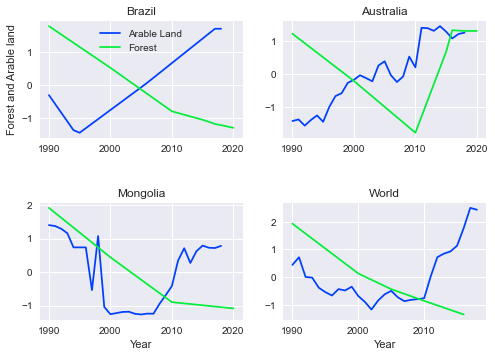

In [19]:
plt.style.use('seaborn-bright')    #pick my style of plot

fig=plt.subplot(2,2,1)                 # using subplot to get a time series plot for arable and forest land, showing the trends
plt.plot(zscorebrazil)
plt.title("Brazil")
plt.ylabel("Forest and Arable land")
plt.legend([ba,bf])              # plt.legend need to capture my handles. so i used the renaming variable from last cell: ba,bf

plt.subplot(2,2,2)
plt.plot(zscoreaus)
plt.title("Australia")


plt.subplot(2,2,3)
plt.plot(zscoremong)
plt.title("Mongolia")
plt.xlabel('Year')


plt.subplot(2,2,4)
plt.plot(zscoreworld)
plt.title("World")
plt.xlabel('Year')


plt.subplots_adjust(wspace=0.2,hspace=0.55)  #adjust so the plots are neater and not clumped up together

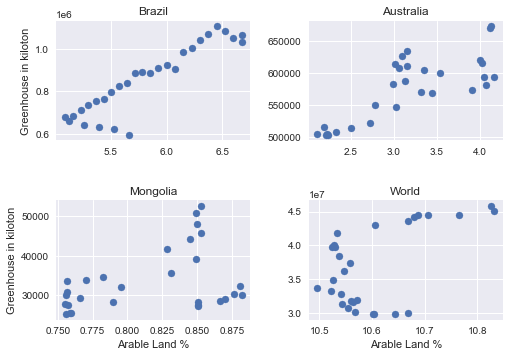

In [20]:
plt.style.use('seaborn')     

fig=plt.subplot(2,2,1)
plt.scatter(brazila,brazilg)      # Same principle as last cell but this time using scatter plot for correlation purposes
plt.title("Brazil")
plt.ylabel("Greenhouse in kiloton")


plt.subplot(2,2,2)
plt.scatter(ausa,ausg)
plt.title("Australia") 

plt.subplot(2,2,3)
plt.scatter(mona,mong)
plt.title("Mongolia")
plt.xlabel('Arable Land %')
plt.ylabel("Greenhouse in kiloton")

plt.subplot(2,2,4)
plt.scatter(wa,wg)
plt.title("World")
plt.xlabel('Arable Land %')


plt.subplots_adjust(wspace=0.3,hspace=0.5)

In [15]:
"""
This cell is for creating a correlation for 3 variables with columns
Arable land , Forest land and greenhouse gases. I used pd.concat to 
join all the variable with the same country together and then using
the columning() function i defined in first cell to rename them with
the correct variables because it was only showing the country names

"""

brazilcor=pd.concat([brazila,brazilf,brazilg],axis=1)   
mongcor=pd.concat([mona,monf,mong],axis=1)            
auscor=pd.concat([ausa,ausf,ausg],axis=1)
worldcor=pd.concat([wa,wf,wg],axis=1)

columning(brazilcor)    #renaming the variable above with the function from cell 1 columning()
columning(mongcor)
columning(auscor)
columning(worldcor)


corrbra = brazilcor.astype('float64').corr()   #correlation for 3 variables for each country
corrmong=mongcor.astype('float64').corr()
corraus=auscor.astype('float64').corr()
corrworld=worldcor.astype('float64').corr()

In [ ]:
corrbra   # observing the values for each country

In [ ]:
corrmong

In [ ]:
corraus

In [ ]:
corrworld

In [ ]:
print(brazilf.mean(),ausf.mean(),monf.mean(),wf.mean())   # observing the mean value for each country

In [13]:
"""
This cell is for calculating the drop in forest land by using dataframe.iloc to extract
the first row 1990 to the latest date of the row which most cases are 2020 but for world is 2016

"""
diffbra=(brazilf.iloc[30]-brazilf.iloc[0])   # subtracting to see the difference of land compared to the earlier date in sq km
diffaus=(ausf.iloc[30]-ausf.iloc[0])
diffmon=(monf.iloc[30]-monf.iloc[0])
diffworld=(wf.iloc[26]-wf.iloc[0])


percfbra=diffbra/brazilf.iloc[0]*100
percaus=diffaus/ausf.iloc[0]*100      # Calculating the percentage change for each country 
percmon=diffmon/monf.iloc[0]*100
percworld=diffworld/wf.iloc[0]*100



print('percentage change = brazil:',percfbra,'aus:',percaus,'mongolia:',percmon,'world:',percworld) # printing values


percentage change = brazil: -15.669674544657989 aus: 0.0917971171671813 mongolia: -1.2487458193980014 world: -3.20824258980244


In [14]:
print('brazil:',diffbra,'aus:',percaus,'diffaus:',diffmon,'world:',diffworld)

brazil: -922784.0 aus: 0.0917971171671813 diffaus: -1792.2000000000116 world: -1324449.0
